## Some Regression problem on winequality-white.csv

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler,MaxAbsScaler,QuantileTransformer,RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
directory = os.path.join('D:/Bootcamp ML - Mada/regression dataset/', 'winequality-white.csv')
if os.path.isfile(directory):
  print("File ditemukan")
else:
    print("tidak ada")

File ditemukan


In [3]:
dataset = pd.read_csv(directory,delimiter=';')
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Replacing '0' values from 'citric_acid' feature with its median values

In [6]:
median_ca = dataset['citric_acid'].astype('float').median(axis=0)
dataset['citric_acid'].replace(0.0, median_ca , inplace=True)
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Plotting Histogram

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'residual_sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>],
       [<AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

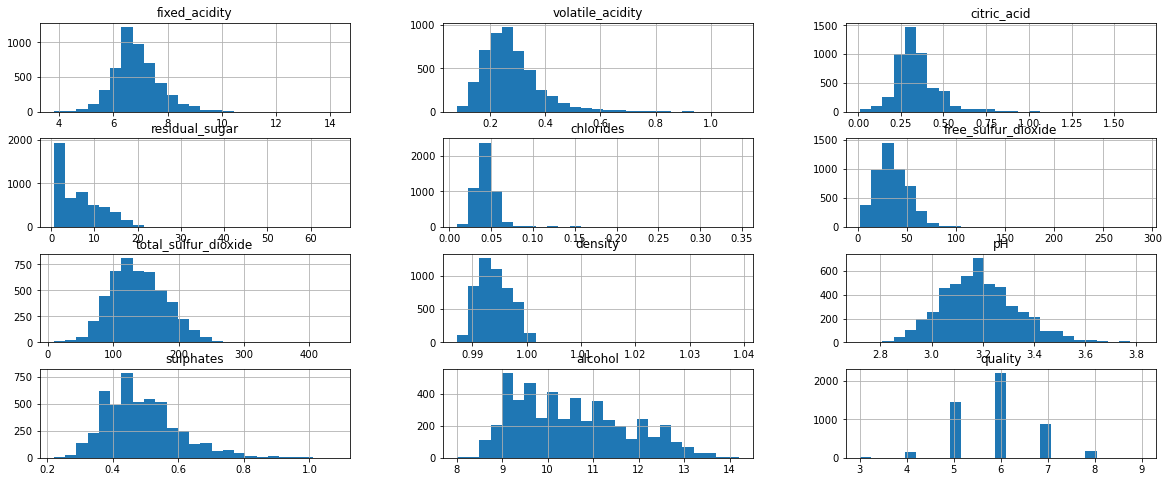

In [7]:
dataset.hist(bins=25,figsize=(20,8))

## Correlation Matrix of the features

In [8]:
correlation_matrix = dataset.corr()
corr = correlation_matrix['quality'].sort_values(ascending=False)
correlation_dataframe = pd.DataFrame({'column': corr.index,
                 'Correlation with quality': corr.values})
correlation_dataframe

,column,Correlation with quality
0,quality,1.000000
1,alcohol,0.435575
2,pH,0.099427
3,sulphates,0.053678
4,free_sulfur_dioxide,0.008158
5,citric_acid,-0.018435
6,residual_sugar,-0.097577
7,fixed_acidity,-0.113663
8,total_sulfur_dioxide,-0.174737
9,volatile_acidity,-0.194723


<AxesSubplot:>

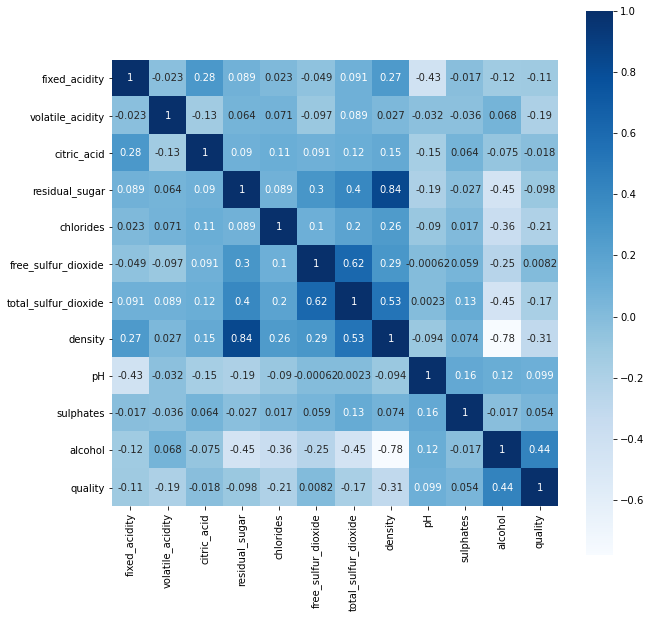

In [9]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,vmax=1,square=True,annot=True,cmap='Blues')

## Feature Engineering with various Scaller Algorithm

In [10]:
label = dataset['quality'] #--> Target Prediksi
feature_used = dataset.drop(['quality'],axis=1) #--> Fitur yang digunakan adalah selain fitur 'quality'

# Scalling Data
scaler_1 = StandardScaler(with_mean=True,with_std=True,copy=True)
scaler_2 = PowerTransformer(method='yeo-johnson', standardize=True)
scaler_3 = PowerTransformer(method='box-cox',standardize=True)
scaler_4 = QuantileTransformer(n_quantiles=100,output_distribution='uniform', random_state=304)
scaler_5 = MinMaxScaler(feature_range=(0,1),copy=True)
scaler_6 = MaxAbsScaler(copy=True)
scaler_7 = RobustScaler(with_centering=True,with_scaling=True,quantile_range=(25.0,75.0))

x_1 = scaler_1.fit_transform(feature_used.values)
y_1 = scaler_1.fit_transform(label.values.reshape(-1,1)).flatten()

x_2 = scaler_2.fit_transform(feature_used.values)
y_2 = scaler_2.fit_transform(label.values.reshape(-1,1)).flatten()

x_3 = scaler_3.fit_transform(feature_used.values)
y_3 = scaler_3.fit_transform(label.values.reshape(-1,1)).flatten()

x_4 = scaler_4.fit_transform(feature_used.values)
y_4 = scaler_4.fit_transform(label.values.reshape(-1,1)).flatten()

x_5 = scaler_5.fit_transform(feature_used.values)
y_5 = scaler_5.fit_transform(label.values.reshape(-1,1)).flatten()

x_6 = scaler_6.fit_transform(feature_used.values)
y_6 = scaler_6.fit_transform(label.values.reshape(-1,1)).flatten()

x_7 = scaler_7.fit_transform(feature_used.values)
y_7 = scaler_7.fit_transform(label.values.reshape(-1,1)).flatten()


In [11]:
def scores(test,prediction):
    print("skor r2 : {:.3f}".format(r2_score(test,prediction)))
    print("skor mse : {:.3f}".format(mean_squared_error(test,prediction)))
    print("skor mea : {:.3f}".format(mean_absolute_error(test,prediction)))
    print("skor RMSE : {:.3f}".format(np.sqrt(mean_squared_error(test,prediction))))

## Scaler Power transformer menggunakan box-cox tidak bisa digunakan karena data pada fitur terdapat nilai 0. Box-cox hanya bisa digunakan dengan data yang benar-benar positif ( nilai > 0)

Solusinya adalah dengan menghapus atau mengganti nilai 0 pada fitur. Pada tugas ini, saya men-drop fitur 'citric_acid' yang didalamnya terdapat nilai 0. Selanjutnya dapat mencoba solusi lainnya, seperti mengganti nilai 0 dengan mean/median 

In [21]:
# Menggunakan Standard Scaler
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)

[0.28595685 0.2999423  0.27999556 0.2374544  0.22705077 0.19065139
 0.36055681 0.3071252  0.21134457 0.25119143]
skor r2 : 0.290
skor mse : 0.707
skor mea : 0.655
skor RMSE : 0.841


In [13]:
# Menggunakan Power Transform 'yeo-jhonson'
feature_train, feature_test, label_train, label_test = train_test_split(x_2, y_2, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)

[0.27897432 0.30683118 0.25762471 0.24866044 0.23623127 0.20191889
 0.36576637 0.32200597 0.24166201 0.26646426]
skor r2 : 0.293
skor mse : 0.697
skor mea : 0.653
skor RMSE : 0.835


In [14]:
# Menggunakan Box-Cox
feature_train, feature_test, label_train, label_test = train_test_split(x_3, y_3, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)

[0.27366664 0.31808497 0.26437022 0.25855485 0.24159475 0.25026715
 0.37057105 0.32766908 0.24405701 0.27849578]
skor r2 : 0.298
skor mse : 0.693
skor mea : 0.653
skor RMSE : 0.833


In [15]:
# Menggunakan Quantile Transform 
feature_train, feature_test, label_train, label_test = train_test_split(x_4, y_4, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)

[0.3153457  0.35948751 0.30050471 0.26343365 0.26719748 0.29189713
 0.38316013 0.34047336 0.28875138 0.31149221]
skor r2 : 0.316
skor mse : 0.050
skor mea : 0.187
skor RMSE : 0.225


In [16]:
# Menggunakan min-max Transform 
feature_train, feature_test, label_train, label_test = train_test_split(x_5, y_5, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train,label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)

[0.28595685 0.2999423  0.27999556 0.2374544  0.22705077 0.19065139
 0.36055681 0.3071252  0.21134457 0.25119143]
skor r2 : 0.290
skor mse : 0.015
skor mea : 0.097
skor RMSE : 0.124


In [17]:
# Menggunakan max absolute scaller
feature_train, feature_test, label_train, label_test = train_test_split(x_6, y_6, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg,feature_train,label_train, cv=10)
print(cross_val)              
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)

[0.28595685 0.2999423  0.27999556 0.2374544  0.22705077 0.19065139
 0.36055681 0.3071252  0.21134457 0.25119143]
skor r2 : 0.290
skor mse : 0.007
skor mea : 0.064
skor RMSE : 0.083


In [18]:
# Menggunakan robust scaller
feature_train, feature_test, label_train, label_test = train_test_split(x_7, y_7, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg,feature_train,label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)

[0.28595685 0.2999423  0.27999556 0.2374544  0.22705077 0.19065139
 0.36055681 0.3071252  0.21134457 0.25119143]
skor r2 : 0.290
skor mse : 0.555
skor mea : 0.580
skor RMSE : 0.745


# RandomForestRegressor

In [19]:
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
rfr = RandomForestRegressor(n_estimators=100,criterion='mse',max_features='auto')
rfr.fit(feature_train,label_train)
cross_val = cross_val_score(rfr,feature_train,label_train, cv=10)
print(cross_val)
predictions = rfr.predict(feature_test)
scores(label_test,predictions)



[0.49221467 0.54902837 0.50385876 0.48352084 0.46722977 0.48571405
 0.57441361 0.49519672 0.47582663 0.38870837]
skor r2 : 0.551
skor mse : 0.447
skor mea : 0.486
skor RMSE : 0.669


# XGBoost Regressor

In [20]:
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

xgb.fit(feature_train,label_train)
cross_val = cross_val_score(xgb,feature_train,label_train, cv=10)
print(cross_val)
predictions = xgb.predict(feature_test)
scores(label_test,predictions)

[0.35896792 0.4971614  0.44813371 0.40510328 0.41767438 0.39249984
 0.53056626 0.45823415 0.36108931 0.28866037]
skor r2 : 0.434
skor mse : 0.564
skor mea : 0.525
skor RMSE : 0.751


# SVM

In [22]:
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
kernels =['poly','linear','rbf']
for index,value in enumerate(kernels):
    print("Menggunakan kernel "+str(value))
    svm = SVR(kernel=value)
    svm.fit(feature_train,label_train)
    cross_val = cross_val_score(svm,feature_train,label_train, cv=10)
    print(cross_val)
    predictions = svm.predict(feature_test)
    scores(label_test,predictions)
    print()

Menggunakan kernel poly
[  0.32955985   0.23105869   0.20618233   0.17066211  -0.26266175
 -30.25134597   0.33344344   0.26329537   0.18505369   0.22750915]
skor r2 : 0.149
skor mse : 0.848
skor mea : 0.680
skor RMSE : 0.921

Menggunakan kernel linear
[0.28591717 0.28166205 0.26380425 0.2292884  0.23509714 0.19909289
 0.36110584 0.31334022 0.21100199 0.24446022]
skor r2 : 0.284
skor mse : 0.713
skor mea : 0.654
skor RMSE : 0.844

Menggunakan kernel rbf
[0.42951042 0.38119903 0.39393966 0.33757514 0.35568586 0.3611946
 0.48853057 0.42992344 0.35377672 0.32618203]
skor r2 : 0.391
skor mse : 0.606
skor mea : 0.589
skor RMSE : 0.778



# KNN Regressor

In [23]:
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
numbers =16
for i in range(numbers):
    if i % 2 !=0:
        print("Menggunakan nilai k :"+str(i))
        knn = KNeighborsRegressor(n_neighbors=i,algorithm='auto',weights='distance')
        knn.fit(feature_train,label_train)
        cross_val = cross_val_score(knn,feature_train,label_train, cv=10)
        print(cross_val)
        predictions = knn.predict(feature_test)
        scores(label_test,predictions)
        print()
    


Menggunakan nilai k :1
[0.26475708 0.34742517 0.24133825 0.15587763 0.01544734 0.21061659
 0.25611065 0.11865846 0.14751199 0.09098882]
skor r2 : 0.203
skor mse : 0.793
skor mea : 0.507
skor RMSE : 0.891

Menggunakan nilai k :3
[0.4435118  0.43909932 0.41529222 0.37621617 0.3277147  0.46276572
 0.46457539 0.36634038 0.35904559 0.35012117]
skor r2 : 0.436
skor mse : 0.562
skor mea : 0.468
skor RMSE : 0.750

Menggunakan nilai k :5
[0.4545588  0.47195143 0.45617487 0.42781035 0.4047665  0.48960443
 0.51051629 0.41166269 0.42921527 0.39708431]
skor r2 : 0.493
skor mse : 0.505
skor mea : 0.451
skor RMSE : 0.711

Menggunakan nilai k :7
[0.45942312 0.4823643  0.483087   0.44155118 0.41918457 0.50471589
 0.56310461 0.41351154 0.46122397 0.4249367 ]
skor r2 : 0.528
skor mse : 0.470
skor mea : 0.441
skor RMSE : 0.685

Menggunakan nilai k :9
[0.46503479 0.49340105 0.50110963 0.44058974 0.44290174 0.50241456
 0.57054789 0.4257933  0.46510759 0.4456105 ]
skor r2 : 0.548
skor mse : 0.450
skor mea : 